In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier

In [2]:
def get_total_file():
    file_list1 = []
    file_list2 = []
    file_list3 = []
    file_list4 = []
    file_list5 = []
    file_list6 = []
    file_list7 = []
    file_list8 = []
    file_list9 = []
    file_list10 = []
    file_list11 = []
    file_list12 = []
    file_list13 = []
    file_list14 = []
    for root, dirs, files in os.walk("HMP_DataSet/Brush_teeth"):  
        for filename in files:
            file_list1.append("HMP_DataSet/Brush_teeth/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Climb_stairs"):  
        for filename in files:
            file_list2.append("HMP_DataSet/Climb_stairs/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Comb_hair"):  
        for filename in files:
            file_list3.append("HMP_DataSet/Comb_hair/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Descend_stairs"):  
        for filename in files:
            file_list4.append("HMP_DataSet/Descend_stairs/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Drink_glass"):  
        for filename in files:
            file_list5.append("HMP_DataSet/Drink_glass/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Eat_meat"):  
        for filename in files:
            file_list6.append("HMP_DataSet/Eat_meat/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Eat_soup"):  
        for filename in files:
            file_list7.append("HMP_DataSet/Eat_soup/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Getup_bed"):  
        for filename in files:
            file_list8.append("HMP_DataSet/Getup_bed/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Liedown_bed"):  
        for filename in files:
            file_list9.append("HMP_DataSet/Liedown_bed/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Pour_water"):  
        for filename in files:
            file_list10.append("HMP_DataSet/Pour_water/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Sitdown_chair"):  
        for filename in files:
            file_list11.append("HMP_DataSet/Sitdown_chair/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Standup_chair"):  
        for filename in files:
            file_list12.append("HMP_DataSet/Standup_chair/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Use_telephone"):  
        for filename in files:
            file_list13.append("HMP_DataSet/Use_telephone/" + filename)
    for root, dirs, files in os.walk("HMP_DataSet/Walk"):  
        for filename in files:
            file_list14.append("HMP_DataSet/Walk/" + filename)
    File_list = [file_list1, file_list2, file_list3, file_list4, file_list5, file_list6, file_list7, file_list8, file_list9,file_list10,file_list11,file_list12,file_list13,file_list14]
    return File_list

In [3]:
File_list = get_total_file()

In [4]:
def getData():
    value_list = list()
    data_raw_list = list()
    for file in File_list:
        data_list = list()
        for s in range(len(file)):
            data_raw = pd.read_csv(file[s], header = None, sep = ' ', dtype = float)
            data = np.asarray(data_raw)
            data_raw_list.append(data_raw)
            data_list.append(data)
        value_list.append(data_list)
    return value_list, data_raw_list

In [5]:
def flattenData(data_raw_list, Size:int):    
    new_data = list()
    for i in range(len(data_raw_list)):
        d = np.asarray(data_raw_list[i])
        n, m = d.shape
        if n % Size == 0:
            c = d.reshape(int(n/Size), int(3*Size))
            C = pd.DataFrame(c)
            new_data.append(C)
        if n % Size != 0:
            overlap = d[-Size:,]
            remained = d[:int(Size*(n//Size)),]
            con = np.concatenate((remained, overlap), axis=0)
            f, x = con.shape
            c = con.reshape(int(f/Size), int(3*Size))
            C = pd.DataFrame(c)
            new_data.append(C)
    flat = pd.concat(new_data, ignore_index=True)
    flattened_data = np.asarray(flat)
    return flattened_data

In [6]:
value_list, data_raw_list = getData()
flattened_data = flattenData(data_raw_list, 32)

In [7]:
def K_means_level1(k, flattened_data):
    model = KMeans(n_clusters = k).fit(flattened_data)
    l = model.predict(flattened_data)
    return l

In [8]:
l = K_means_level1(5, flattened_data)

In [9]:
def K_means_level2(k, k1, l):
    n = l.shape[0]
    data_new = np.concatenate((flattened_data,l.reshape(n,1)),axis=1) 
    df_new = pd.DataFrame(data_new)
    df_list = list()
    center_list = list()
    index_list = list()
    for i in range(k):
        df = df_new[df_new[96]==i].drop([96],axis=1,inplace=False)
        df_list.append(df)
    for k in range(len(df_list)):
        data_k = np.asarray(df_list[k])
        model = KMeans(n_clusters = k1).fit(data_k)
        center_list.append(model.cluster_centers_)
        index = model.predict(data_k)
        for j in range(index.shape[0]):
            index[j] = k*12 + index[j]
        index_list.append(index)
    return center_list, index_list

In [10]:
center_list, index_list = K_means_level2(5, 12, l)

In [11]:
def getInfo_cluster(center_list, index_list, flattened_data):
    len_center = len(center_list)
    dim_center, num_figure = center_list[0].shape
    center_total = np.asarray(center_list).reshape(int(len_center*dim_center), num_figure)
    number = flattened_data.shape[0]
    index_stat = np.zeros(int(len_center*dim_center))
    for i in range(int(len_center*dim_center)):
        for j in range(len(index_list)):
            for k in range(index_list[j].shape[0]):
                if index_list[j][k] == i:
                    index_stat[i] += 1
    return center_total, index_stat

In [12]:
center_total, index_stat = getInfo_cluster(center_list, index_list, flattened_data)

In [13]:
center_total.shape[0]

60

<BarContainer object of 60 artists>

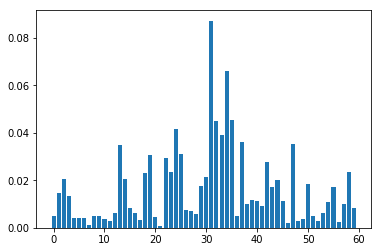

In [14]:
plt.bar(range(index_stat.shape[0]), index_stat/flattened_data.shape[0])

In [15]:
def get_train_test(value_list):
    label_list = []
    train = []
    test = []
    train_label = []
    test_label = []
    for i in range(len(value_list)):
        label = []
        for j in range(len(value_list[i])):
            label.append(i + 1)
        label_list.append(label)
    for s in range(len(value_list)):
        x_train, x_test, y_train, y_test = train_test_split(value_list[s], label_list[s], test_size = 1/3)
        train.append(x_train)
        train_label.append(y_train)
        test.append(x_test)
        test_label.append(y_test)
    return train, test, train_label, test_label

In [18]:
def get_CV(value_list):
    label_list = []
    train_1 = []
    train_2 = []
    train_3 = []
    test_1 = []
    test_2 = []
    test_3 = []
    train_label_1 = []
    train_label_2 = []
    train_label_3 = []
    test_label_1 = []
    test_label_2 = []
    test_label_3 = []
    Train = []
    Test = []
    Train_label = []
    Test_label = []
    for i in range(len(value_list)):
        label = []
        for j in range(len(value_list[i])):
            label.append(i + 1)
        label_list.append(label)
    for s in range(len(value_list)):
        f1 = value_list[s][0:int((1/3)*len(value_list[s]))]
        f2 = value_list[s][int((1/3)*len(value_list[s])):2*int((1/3)*len(value_list[s]))]
        f3 = value_list[s][2*int((1/3)*len(value_list[s])):len(value_list[s])]
        y1 = label_list[s][0:int((1/3)*len(label_list[s]))]
        y2 = label_list[s][int((1/3)*len(label_list[s])):2*int((1/3)*len(label_list[s]))]
        y3 = label_list[s][2*int((1/3)*len(label_list[s])):len(label_list[s])]
        train_1.append(f1+f2)
        train_2.append(f1+f3)
        train_3.append(f2+f3)
        test_1.append(f3)
        test_2.append(f2)
        test_3.append(f1)
        train_label_1.append(y1+y2)
        train_label_2.append(y1+y3)
        train_label_3.append(y2+y3)
        test_label_1.append(y3)
        test_label_2.append(y2)
        test_label_3.append(y1)
    Train.append(train_1)
    Train.append(train_2)
    Train.append(train_3)
    Test.append(test_1)
    Test.append(test_2)
    Test.append(test_3)
    Train_label.append(train_label_1)
    Train_label.append(train_label_2)
    Train_label.append(train_label_3)
    Test_label.append(test_label_1)
    Test_label.append(test_label_2)
    Test_label.append(test_label_3)
    return Train, Test, Train_label, Test_label

In [19]:
def flattenData2(data, Size:int):  
    flat = []
    for i in range(len(data)):
        flat_in =[]
        for l in range(len(data[i])):
            d = data[i][l]
            n, m = d.shape
            if n % Size == 0:
                c = d.reshape(int(n/Size), int(3*Size))
                flat_in.append(c)
            if n % Size != 0:
                overlap = d[-Size:,]
                remained = d[:int(Size*(n//Size)),]
                con = np.concatenate((remained, overlap), axis=0)
                f, x = con.shape
                c = con.reshape(int(f/Size), int(3*Size))
                flat_in.append(c)
        flat.append(flat_in)
    return flat

In [20]:
def make_array(data):
    new_data = []
    for i in range(len(data)):
        for j in range(len(data[i])):
            new_data.append(data[i][j])
    data = np.asarray(new_data) 
    return data

In [21]:
def KNN_classifier(data_train, center_total):
    KNN = KNeighborsClassifier(n_neighbors = 1) 
    n, m = center_total.shape
    KNN.fit(center_total, range(n))
    predict_list = []
    for i in range(data_train.shape[0]):
        y_pred = KNN.predict(data_train[i]) 
        predict_list.append(y_pred)
    prediction = np.asarray(predict_list)
    return prediction

In [22]:
def RandomForest_classifier(data_train, center_total):
    RF = RandomForestClassifier(n_estimators = 100, max_depth = 80)
    n, m = center_total.shape
    RF.fit(center_total, range(n))
    predict_list = []
    for i in range(data_train.shape[0]):
        y_pred = RF.predict(data_train[i]) 
        predict_list.append(y_pred)
    prediction = np.asarray(predict_list)
    return prediction

In [23]:
def generate_Mat(prediction, center_total):
    n, m = center_total.shape
    M = np.zeros((prediction.shape[0], n))
    for i in range(n):
        for j in range(prediction.shape[0]):
            for k in range(prediction[j].shape[0]):
                if prediction[j][k] == i:
                    M[j][i] += 1 
    for l in range(prediction.shape[0]):
        q = np.sum(M[l])
        for f in range(n):
            M[l][f] = M[l][f]/q
    return M

In [24]:
def KNN_classifier_2(M_train, M_test, label_train):
    KNN = KNeighborsClassifier(n_neighbors = 1) 
    KNN.fit(M_train, label_train)
    y_pred = KNN.predict(M_test) 
    return y_pred

In [25]:
def RandomForestClassifier_2(M_train, M_test, label_train):
    RF = RandomForestClassifier(n_estimators = 100, max_depth = 80)
    RF.fit(M_train, label_train)
    y_pred = RF.predict(M_test) 
    return y_pred

In [26]:
def getAccuracy(pred_RF, label_test):
    count = 0
    for i in range(pred_RF.shape[0]):
        if pred_RF[i] == label_test[i]:
            count = count + 1
    Acc = count/pred_RF.shape[0]
    return Acc

In [29]:
def main():
    File_list = get_total_file()
    value_list, data_raw_list = getData()
    flattened_data = flattenData(data_raw_list, 32)
    l = K_means_level1(4, flattened_data)
    center_list, index_list = K_means_level2(4, 12, l)
    center_total, index_stat = getInfo_cluster(center_list, index_list, flattened_data)
    Train, Test, Train_label, Test_label = get_CV(value_list)
    Acc = []
    for j in range(len(Train)):
        train = Train[j]
        test = Test[j]
        train_label = Train_label[j]
        test_label = Test_label[j]
        data_train = make_array(flattenData2(train, 32))
        data_test = make_array(flattenData2(test, 32))
        label_train = make_array(train_label)
        label_test = make_array(test_label)
        prediction_RF = RandomForest_classifier(data_train, center_total)
        prediction_RFtest = RandomForest_classifier(data_test, center_total)
        M_train_RF = generate_Mat(prediction_RF, center_total)
        M_test_RF = generate_Mat(prediction_RFtest, center_total)
        pred_RF = RandomForestClassifier_2(M_train_RF, M_test_RF, label_train)
        Acc.append(getAccuracy(pred_RF, label_test))
    print(Acc)
    return Acc

In [30]:
Acc = main()

[0.662020905923345, 0.7608695652173914, 0.6847826086956522]
